### 데이터 불러오기

In [1]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기
train_df=pd.read_csv('./train.csv')
test_df=pd.read_csv('./test.csv')
submission=pd.read_csv('./gender_submission.csv')

In [3]:
## 학습 데이터셋 확인
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# 테스트 데이터셋 확인 
test_df.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
## fixed random seed
import random
np.random.seed(1234)
random.seed(1234)

## EDA( 탐색적 데이터 분석 )
#### 데이터의 개요 확인
##### 데이터의 행과 열 확인 

In [6]:
# 데이터 크기 확인 -> 11인 이유 : test에는 target 데이터 존재 X
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


#### 데이터 속성 확인

In [7]:
# 데이터 타입 확인
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# 데이터의 기본정보 확인
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


#### 데이터 기초 통계

In [9]:
# 데이터 기본 통계 확인
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### 카테고리 변수 확인

In [10]:
# 성별의 고유값 확인
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [11]:
# Embarked : 항구
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [12]:
# Cabin은 범주형이 X
train_df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

##### 결측치 확인

In [13]:
# train 셋의 전체 결측값 개수 확인
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Visualize

In [14]:
# 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns



In [15]:
plt.style.use('ggplot')

#### 데이터 셀렉

In [16]:
# 데이터 프레임에서 원하는 컬럼만 추출
df_select=train_df[['Embarked','Survived','PassengerId']]
df_select

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [17]:
# 결측값 제거로 2개 행 삭제
df_select.dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [18]:
# Embarked와 Survived로만 집계
train_df[['Embarked','Survived','PassengerId']].dropna().groupby(['Embarked','Survived']).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [19]:
# unstack : 둘다 행으로 변환
embarked_df = train_df[['Embarked','Survived','PassengerId']].dropna().groupby(['Embarked','Survived']).count().unstack()

In [20]:
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

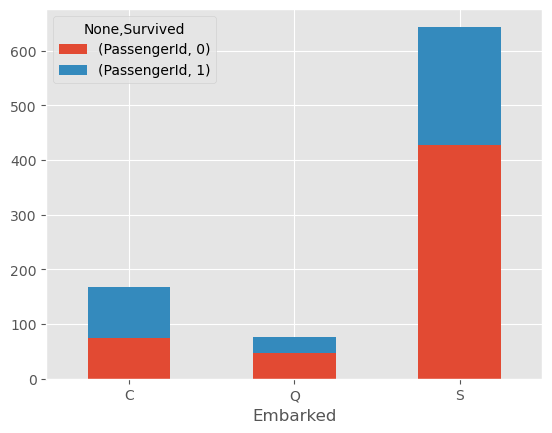

In [21]:
# 누적 그래프 그리기- Embarked
embarked_df.plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.show()

In [22]:
# 성별 그룹별 시각화 - Sex
sex_df=train_df[['Sex','Survived','PassengerId']].dropna().groupby(['Sex','Survived']).count().unstack()

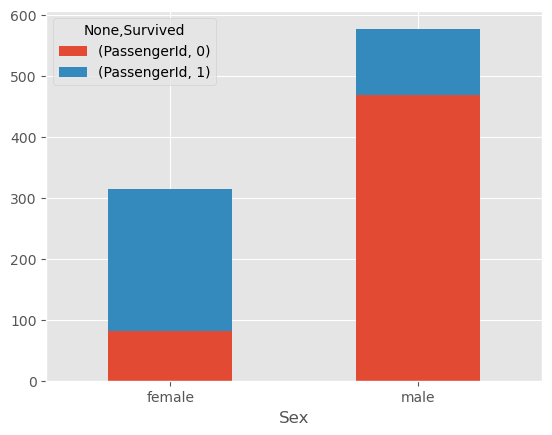

In [23]:
sex_df.plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.show()

##### ***성별과 생존률은 선형적 관계가 존재

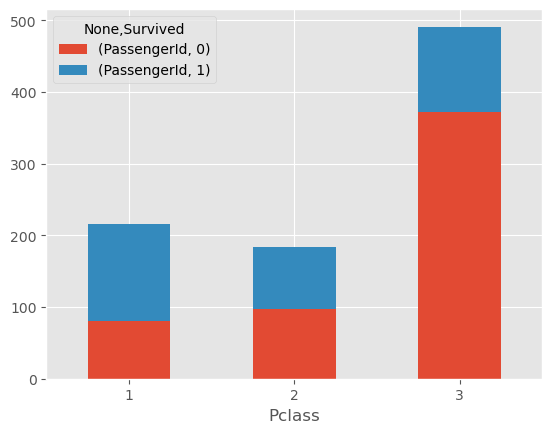

In [24]:
# Class
class_df = train_df[['Pclass','Survived','PassengerId']].dropna().groupby(['Pclass','Survived']).count().unstack()
class_df.plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.show()

In [25]:
# 탑승구역, 성별, 클래스와 사망의 상관관계
# 카테고리 변수 -> 더미변수 변환
# drop_first는 고유 범주가 3개 이상이면 사용하면 안됨
train_df_corr = pd.get_dummies(train_df,columns=['Sex'],drop_first=True)
train_df_corr = pd.get_dummies(train_df_corr,columns=['Embarked'])

In [26]:
train_df_corr.corr(numeric_only=True)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


In [27]:
train_df_corr=train_df_corr[['Survived','Pclass','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]

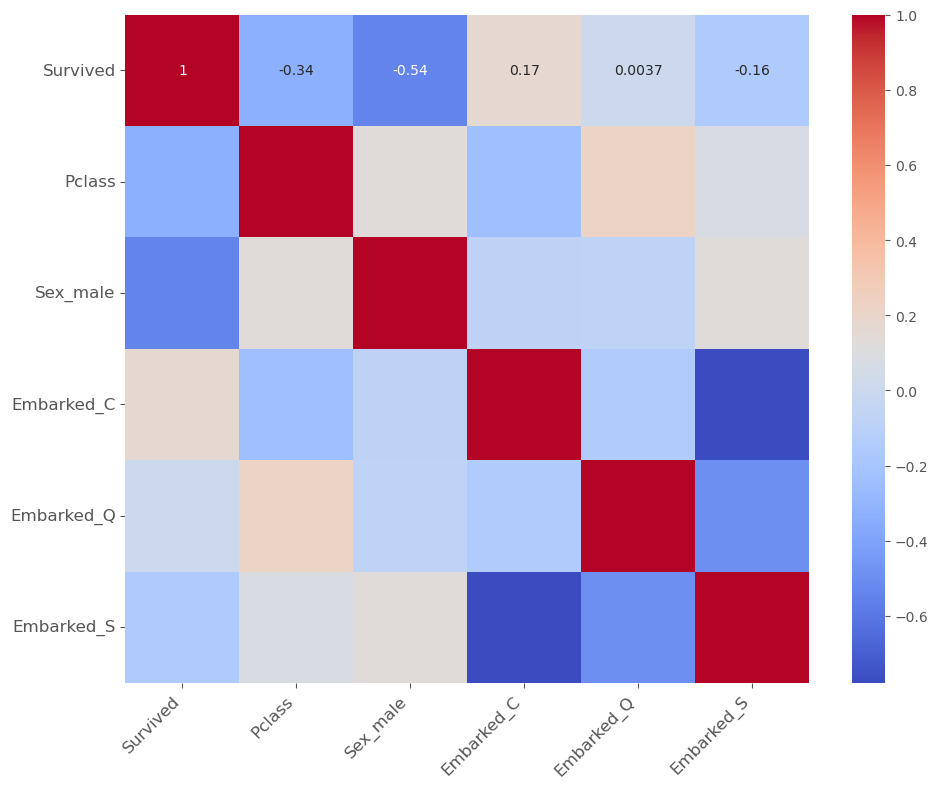

In [28]:
numeric_data=train_df_corr.corr(numeric_only=True)


plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(numeric_data, annot=True, cmap='coolwarm', annot_kws={"size": 10})

# 글자가 잘리지 않도록 조정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

# 열지도 표시
plt.show()

### 데이터 전처리 & 특성공학
### 데이터 전처리와 특징값 생성

In [29]:
all_df=pd.concat([train_df,test_df],sort=False).reset_index(drop=True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [31]:
# 1. 평균값으로 Fare 매꾸기
# 각 클래스별 평균값
fare_mean=all_df[['Pclass','Fare']].groupby('Pclass').mean().reset_index()
fare_mean

,Pclass,Fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [32]:
# 컬럼 이름 재설정
fare_mean.columns=['Pclass','fare_mean']
fare_mean

,Pclass,fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [33]:
all_df=pd.merge(all_df,fare_mean,on='Pclass',how='left')
all_df.loc[(all_df['Fare'].isnull()),'Fare']=all_df['fare_mean']
all_df=all_df.drop('fare_mean',axis=1)

In [34]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [35]:
# 2. 나이 결측값 교정하기

In [36]:
all_df['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [37]:
name_df=all_df['Name'].str.split('[,.]',n=2,expand=True)

In [38]:
name_df.columns=['family_name','honorific','name']
name_df.head()

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry


In [39]:
#  앞뒤 공백 제거
name_df['honorific']=name_df['honorific'].str.strip()

In [40]:
# 호칭의 유니크값 확인
name_df['honorific'].value_counts()

honorific
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [41]:
# all_df, name_df를 합치기
all_df=pd.concat([all_df,name_df],axis=1)
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry


<Axes: xlabel='honorific', ylabel='Age'>

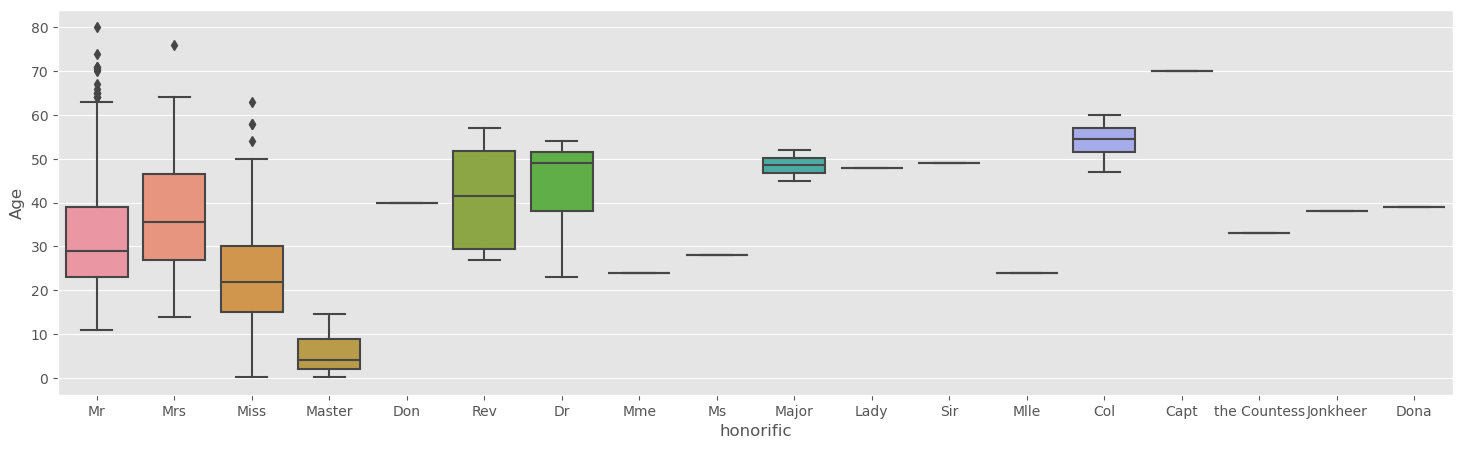

In [42]:
# 호칭과 나이의 분포 확인
plt.figure(figsize=(18,5))
sns.boxplot(x='honorific',y='Age',data=all_df)


In [43]:
# 정량적으로 평균값 확인
all_df[['Age','honorific']].groupby('honorific').mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [44]:
# 호칭별 생존율 차이 확인
train_df=pd.concat([train_df,name_df[0:len(train_df)].reset_index(drop=True)],axis=1)
test_df=pd.concat([test_df,name_df[len(train_df):].reset_index(drop=True)],axis=1)

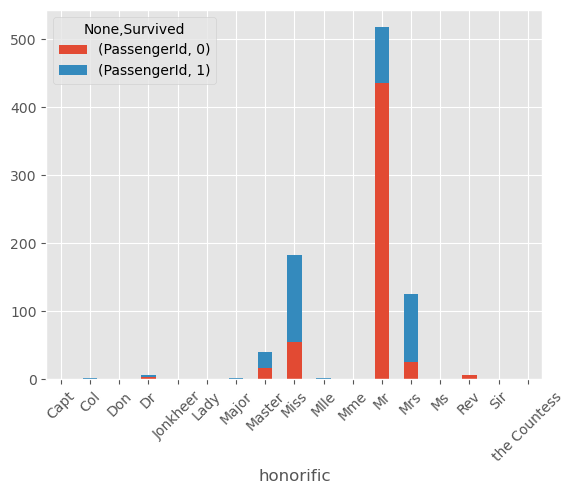

In [45]:
honorific_df=train_df[['honorific','Survived','PassengerId']].dropna().groupby(
    ['honorific','Survived']).count().unstack()
honorific_df.plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.show()

# 호칭(나이대별로 생존율의 차이 발생), 좀 더 나이든 여성의 생존율이 젊은 여성의 생존율 보다 높음.

In [46]:
# 연령의 결측치를 호칭별 평균 연령으로 채워넣기
# 호칭별 평균 구하기
age_mean=all_df[['honorific','Age']].groupby('honorific').mean().reset_index()
age_mean.columns=['honorific','honorific_age']

In [47]:
all_df=pd.merge(all_df,age_mean,on='honorific',how='left')
all_df.loc[(all_df['Age'].isnull()),'Age']=all_df['honorific_age']
all_df=all_df.drop(['honorific_age'],axis=1)

In [48]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
family_name       0
honorific         0
name              0
dtype: int64

In [49]:
# family_num 생성하기 = Parch, Sibsp
all_df['family_num']=all_df['Parch']+all_df['SibSp']

In [50]:
all_df['family_num'].value_counts()

family_num
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

In [51]:
## 혼자 승선했는지 여부를 새로운 독립변수로 추가하기
all_df.loc[all_df['family_num']==0,'alone']=1
all_df['alone'].fillna(0,inplace=True)

In [52]:
# 불필요한 컬럼 삭제
all_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family_name',
       'honorific', 'name', 'family_num', 'alone'],
      dtype='object')

In [53]:
all_df=all_df.drop(['PassengerId','Name','family_name',
                    'name','Ticket','Cabin'],axis=1)

In [54]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [55]:
# 모델의 데이터는 수치형이어야 하기 때문에 카테고리형을 수치화하여야 함
categories = all_df.columns[all_df.dtypes=='object']
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [56]:
# Mr, Miss, Mrs, Master 외에는 모두 Other로 통합
all_df.loc[~((all_df['honorific']=='Mr')|
            (all_df['honorific']=='Miss')|
            (all_df['honorific']=='Mrs')|
            (all_df['honorific']=='Master')),'honorific']='other'
          

In [57]:
all_df.honorific.value_counts()

honorific
Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: count, dtype: int64

In [58]:
# 라벨인코딩
from sklearn.preprocessing import LabelEncoder

In [59]:
all_df['Embarked'].fillna('missing',inplace=True)

In [60]:
all_df['Embarked'].value_counts()

Embarked
S          914
C          270
Q          123
missing      2
Name: count, dtype: int64

In [61]:
# 인코딩 적용
for cat in categories:
    le=LabelEncoder()
    if all_df[cat].dtype=='object':
        le=le.fit(all_df[cat])
        all_df[cat]=le.transform(all_df[cat])

In [62]:
all_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0


In [63]:
# all_df를 train 데이터셋과 test 데이터셋으로 분할
all_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.000000,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.000000,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.000000,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.000000,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.000000,0,0,8.0500,2,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.252151,0,0,8.0500,2,2,0,1.0
1305,NaN,1,0,39.000000,0,0,108.9000,0,4,0,1.0
1306,NaN,3,1,38.500000,0,0,7.2500,2,2,0,1.0
1307,NaN,3,1,32.252151,0,0,8.0500,2,2,0,1.0


In [64]:
train_x=all_df[~all_df['Survived'].isnull()].drop('Survived',axis=1).reset_index(drop=True)
train_y=train_df['Survived']
test_x=all_df[all_df['Survived'].isnull()].drop('Survived',axis=1).reset_index(drop=True)

In [65]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(891, 10)
(891,)
(418, 10)


## 모델링
### LightGBM

In [66]:
%pip install lightgbm==3.3.4

Note: you may need to restart the kernel to use updated packages.


In [67]:
import lightgbm as lgb

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [69]:
x_train, x_valid, y_train, y_valid=train_test_split(train_x,train_y,test_size=0.2)

In [70]:
categories=['Embarked','Pclass','Sex','honorific','alone']

In [71]:
# LightGBM 데이터셋 준비 - 두 데이터셋의 처리를 동일하게 하기위해 이와 같이 처리함
lgb_train=lgb.Dataset(x_train,y_train,categorical_feature=categories)
lgb_eval=lgb.Dataset(x_valid,y_valid,categorical_feature=categories,reference=lgb_train)

In [72]:
# 파라미터 딕셔너리 생성
lgbm_prams={
    'objective' : 'binary', # 타겟이 이진분류기 때문에 binary로 생성
    'random_seed':1234
}

In [73]:
# 모델 학습
model_lgb=lgb.train(lgbm_prams, # 하이퍼 파라미터 전달
                    lgb_train, # 학습 데이터 전달
                    valid_sets=lgb_eval, # 검증셋 전달
                    num_boost_round=100, # 부스팅 반복 횟수
                    early_stopping_rounds=5, # 설정한 횟수동안 손실점수 개선이 없으면 조기종료
                    verbose_eval=10 # 10회 마다 학습 보고
                    )

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

<Axes: >

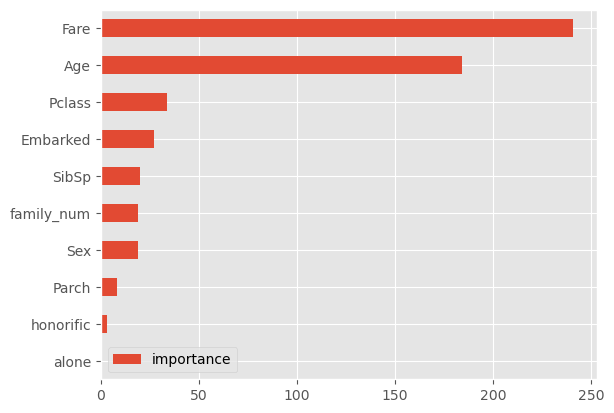

In [77]:
# 수평막대로 특성중요도 확인
importance = pd.DataFrame(model_lgb.feature_importance(),
                index=x_train.columns,
                columns=['importance']).sort_values(by='importance',ascending=True)
importance.plot.barh()

In [79]:
# 생성한 모델을 검증 데이터에 적용하여 정확도 출력
y_pred = model_lgb.predict(x_valid,num_iteration=model_lgb.best_iteration)
y_pred

array([0.91427934, 0.14999972, 0.1071832 , 0.93463902, 0.37445943,
       0.24835484, 0.52603078, 0.40803837, 0.23110359, 0.24143121,
       0.74752657, 0.04366896, 0.0999339 , 0.07118361, 0.17587315,
       0.23110359, 0.0999339 , 0.50443204, 0.136177  , 0.09707383,
       0.06977415, 0.45578449, 0.92584042, 0.15088154, 0.85539486,
       0.1349091 , 0.19738117, 0.92221299, 0.76584299, 0.06037761,
       0.15228454, 0.27970606, 0.37138485, 0.91883278, 0.44240816,
       0.42781726, 0.14659569, 0.1208832 , 0.48389656, 0.64814415,
       0.16297542, 0.84841016, 0.92976765, 0.13458536, 0.1494317 ,
       0.33008622, 0.06958095, 0.05100685, 0.15498808, 0.91966562,
       0.9344308 , 0.07695118, 0.24312052, 0.08948896, 0.64814415,
       0.44055671, 0.08106391, 0.12750053, 0.06790671, 0.03711762,
       0.32097386, 0.54734776, 0.90828575, 0.91345794, 0.08651604,
       0.89949511, 0.60693353, 0.08672629, 0.06691398, 0.0486267 ,
       0.59480159, 0.25590467, 0.06958095, 0.06472031, 0.04948

In [80]:
# 정확도 계산 라이브러리
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,np.round(y_pred))

0.8435754189944135

In [81]:
# 하이퍼 파라미터 튜닝
param_dist = {
    'max_bin': range(300, 350),
    'num_leaves': range(20, 50),
    'min_data_in_leaf': range(50, 80),
}

In [84]:
from sklearn.model_selection import RandomizedSearchCV

# 모델 정의
lgb_estimator = lgb.LGBMClassifier(objective='binary',random_seed=1234)

# 랜덤서치
rsearch=RandomizedSearchCV(estimator=lgb_estimator,param_distributions=param_dist,
                           cv=3,n_iter=50)

# 모델 학습
rsearch.fit(x_train,y_train)

# 최적의 하이퍼 파라미터 출력
print('')
print(rsearch.best_params_)

[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] min

In [87]:
# 하이퍼 파라미터 변경 적용
lgbm_params={
    'objective':'binary',
    'max_bin': 304,
    'num_leaves' : 48,
    'min_data_in_leaf' : 56,
    'random_seed' : 1234  
}

In [88]:
lgb_train = lgb.Dataset(x_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(x_valid, y_valid, categorical_feature=categories, reference=lgb_train)

model_lgb = lgb.train(lgbm_params, 
                      lgb_train, 
                      valid_sets=lgb_eval, 
                      num_boost_round=100,
                      early_stopping_rounds=20,
                      verbose_eval=10)

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [90]:
y_pred=model_lgb.predict(x_valid,num_iteration=model_lgb.best_iteration)
accuracy_score(y_valid,np.round(y_pred))

0.8491620111731844

In [91]:
# 3 폴드 학습진행
folds=3
kf=KFold(n_splits=folds)

In [93]:
models = []

for train_index, val_index in kf.split(train_x):  
    X_train = train_x.iloc[train_index]
    X_valid = train_x.iloc[val_index]
    y_train = train_y.iloc[train_index]
    y_valid = train_y.iloc[val_index]
        
    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
    lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)    
    
    model_lgb = lgb.train(lgbm_params, 
                          lgb_train, 
                          valid_sets=lgb_eval, 
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )
    
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    print(accuracy_score(y_valid, np.round(y_pred)))
    
    models.append(model_lgb)

[LightGBM] [Info] Number of positive: 236, number of negative: 358
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397306 -> initscore=-0.416701
[LightGBM] [Info] Start training from score -0.416701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [94]:
preds=[]

for model in models:
    pred=model.predict(test_x)
    preds.append(pred)

In [96]:
preds_array=np.array(preds)
preds_mean=np.mean(preds_array,axis=0)

In [97]:
preds_mean[:10]

array([0.08637416, 0.48950816, 0.10483669, 0.1576122 , 0.53809772,
       0.15451179, 0.56299776, 0.17482355, 0.70073216, 0.06514701])

In [98]:
# 0.5를 기준으로 0과 1로 변환
preds_int=(preds_mean>0.5).astype(int)
preds_int

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [100]:
# 제출할 파일 생성
submission['Survived']=preds_int
submission.to_csv('./20240817_titanic_submit01.csv',index=False)